## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9906906	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9722462	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9526164	total: 59.6ms	remaining: 19.8s
3:	learn: 0.9359889	total: 60.4ms	remaining: 15s
4:	learn: 0.9197790	total: 61.5ms	remaining: 12.2s
5:	learn: 0.9024448	total: 62.5ms	remaining: 10.3s
6:	learn: 0.8852150	total: 63.4ms	remaining: 8.99s
7:	learn: 0.8694254	total: 64.3ms	remaining: 7.98s
8:	learn: 0.8544063	total: 65.3ms	remaining: 7.2s
9:	learn: 0.8373677	total: 66.2ms	remaining: 6.56s
10:	learn: 0.8227594	total: 67ms	remaining: 6.02s
11:	learn: 0.8089097	total: 67.9ms	remaining: 5.59s
12:	learn: 0.7936547	total: 68.7ms	remaining: 5.22s
13:	learn: 0.7802647	total: 69.6ms	remaining: 4.9s
14:	learn: 0.7675377	total: 70.5ms	remaining: 4.63s
15:	learn: 0.7545227	total: 71.2ms	remaining: 4.38s
16:	learn: 0.7431407	total: 72.2ms	remaining: 4.17s
17:	learn: 0.7306682	total: 72.9ms	remaining: 3.98s
18:	learn: 0.7180302	total: 73.7ms	remaining: 3.81

60:	learn: 0.4223423	total: 108ms	remaining: 1.66s
61:	learn: 0.4185235	total: 109ms	remaining: 1.65s
62:	learn: 0.4153806	total: 110ms	remaining: 1.63s
63:	learn: 0.4112904	total: 111ms	remaining: 1.62s
64:	learn: 0.4080574	total: 111ms	remaining: 1.6s
65:	learn: 0.4042794	total: 112ms	remaining: 1.59s
66:	learn: 0.4013552	total: 113ms	remaining: 1.57s
67:	learn: 0.3973532	total: 114ms	remaining: 1.56s
68:	learn: 0.3948028	total: 115ms	remaining: 1.55s
69:	learn: 0.3922750	total: 115ms	remaining: 1.53s
70:	learn: 0.3882623	total: 116ms	remaining: 1.52s
71:	learn: 0.3842301	total: 117ms	remaining: 1.51s
72:	learn: 0.3817809	total: 118ms	remaining: 1.5s
73:	learn: 0.3781767	total: 119ms	remaining: 1.49s
74:	learn: 0.3757435	total: 120ms	remaining: 1.48s
75:	learn: 0.3730420	total: 120ms	remaining: 1.46s
76:	learn: 0.3697276	total: 121ms	remaining: 1.45s
77:	learn: 0.3664469	total: 122ms	remaining: 1.44s
78:	learn: 0.3633965	total: 123ms	remaining: 1.43s
79:	learn: 0.3605121	total: 124ms

160:	learn: 0.2510319	total: 192ms	remaining: 1s
161:	learn: 0.2504029	total: 193ms	remaining: 999ms
162:	learn: 0.2499494	total: 194ms	remaining: 996ms
163:	learn: 0.2493084	total: 195ms	remaining: 993ms
164:	learn: 0.2485352	total: 196ms	remaining: 990ms
165:	learn: 0.2479620	total: 197ms	remaining: 987ms
166:	learn: 0.2474034	total: 197ms	remaining: 984ms
167:	learn: 0.2464363	total: 198ms	remaining: 981ms
168:	learn: 0.2458619	total: 199ms	remaining: 978ms
169:	learn: 0.2451414	total: 200ms	remaining: 975ms
170:	learn: 0.2444400	total: 201ms	remaining: 972ms
171:	learn: 0.2435645	total: 201ms	remaining: 970ms
172:	learn: 0.2429786	total: 202ms	remaining: 967ms
173:	learn: 0.2421474	total: 203ms	remaining: 964ms
174:	learn: 0.2417733	total: 204ms	remaining: 960ms
175:	learn: 0.2410070	total: 204ms	remaining: 957ms
176:	learn: 0.2401758	total: 205ms	remaining: 953ms
177:	learn: 0.2395117	total: 206ms	remaining: 950ms
178:	learn: 0.2389602	total: 206ms	remaining: 946ms
179:	learn: 0.2

286:	learn: 0.1865924	total: 298ms	remaining: 741ms
287:	learn: 0.1862227	total: 299ms	remaining: 740ms
288:	learn: 0.1860793	total: 300ms	remaining: 738ms
289:	learn: 0.1858621	total: 301ms	remaining: 737ms
290:	learn: 0.1856678	total: 302ms	remaining: 736ms
291:	learn: 0.1851519	total: 303ms	remaining: 734ms
292:	learn: 0.1845423	total: 304ms	remaining: 733ms
293:	learn: 0.1841762	total: 304ms	remaining: 731ms
294:	learn: 0.1839550	total: 305ms	remaining: 729ms
295:	learn: 0.1835670	total: 306ms	remaining: 728ms
296:	learn: 0.1831268	total: 307ms	remaining: 726ms
297:	learn: 0.1828111	total: 308ms	remaining: 725ms
298:	learn: 0.1823083	total: 308ms	remaining: 723ms
299:	learn: 0.1818305	total: 309ms	remaining: 722ms
300:	learn: 0.1815876	total: 310ms	remaining: 721ms
301:	learn: 0.1811333	total: 311ms	remaining: 719ms
302:	learn: 0.1805135	total: 312ms	remaining: 717ms
303:	learn: 0.1799360	total: 313ms	remaining: 716ms
304:	learn: 0.1798014	total: 314ms	remaining: 714ms
305:	learn: 

386:	learn: 0.1556529	total: 382ms	remaining: 606ms
387:	learn: 0.1552434	total: 383ms	remaining: 605ms
388:	learn: 0.1549197	total: 384ms	remaining: 603ms
389:	learn: 0.1546175	total: 385ms	remaining: 602ms
390:	learn: 0.1542312	total: 386ms	remaining: 601ms
391:	learn: 0.1540046	total: 387ms	remaining: 600ms
392:	learn: 0.1537455	total: 387ms	remaining: 598ms
393:	learn: 0.1534645	total: 388ms	remaining: 597ms
394:	learn: 0.1533295	total: 389ms	remaining: 596ms
395:	learn: 0.1530951	total: 390ms	remaining: 594ms
396:	learn: 0.1529277	total: 390ms	remaining: 593ms
397:	learn: 0.1525529	total: 391ms	remaining: 592ms
398:	learn: 0.1524241	total: 392ms	remaining: 591ms
399:	learn: 0.1521401	total: 393ms	remaining: 589ms
400:	learn: 0.1520092	total: 394ms	remaining: 588ms
401:	learn: 0.1516564	total: 395ms	remaining: 587ms
402:	learn: 0.1512699	total: 395ms	remaining: 586ms
403:	learn: 0.1510707	total: 396ms	remaining: 584ms
404:	learn: 0.1506921	total: 397ms	remaining: 583ms
405:	learn: 

514:	learn: 0.1235845	total: 489ms	remaining: 461ms
515:	learn: 0.1233779	total: 490ms	remaining: 460ms
516:	learn: 0.1231531	total: 491ms	remaining: 459ms
517:	learn: 0.1229401	total: 492ms	remaining: 458ms
518:	learn: 0.1226897	total: 493ms	remaining: 457ms
519:	learn: 0.1224898	total: 493ms	remaining: 455ms
520:	learn: 0.1222685	total: 494ms	remaining: 454ms
521:	learn: 0.1221545	total: 495ms	remaining: 453ms
522:	learn: 0.1219864	total: 496ms	remaining: 452ms
523:	learn: 0.1215897	total: 496ms	remaining: 451ms
524:	learn: 0.1214114	total: 497ms	remaining: 450ms
525:	learn: 0.1211993	total: 498ms	remaining: 449ms
526:	learn: 0.1209884	total: 499ms	remaining: 448ms
527:	learn: 0.1207664	total: 500ms	remaining: 447ms
528:	learn: 0.1205875	total: 500ms	remaining: 445ms
529:	learn: 0.1204087	total: 501ms	remaining: 444ms
530:	learn: 0.1202341	total: 502ms	remaining: 443ms
531:	learn: 0.1199957	total: 503ms	remaining: 442ms
532:	learn: 0.1198235	total: 503ms	remaining: 441ms
533:	learn: 

614:	learn: 0.1042308	total: 573ms	remaining: 359ms
615:	learn: 0.1040611	total: 574ms	remaining: 358ms
616:	learn: 0.1038052	total: 575ms	remaining: 357ms
617:	learn: 0.1037003	total: 576ms	remaining: 356ms
618:	learn: 0.1035108	total: 576ms	remaining: 355ms
619:	learn: 0.1034680	total: 577ms	remaining: 354ms
620:	learn: 0.1032850	total: 578ms	remaining: 353ms
621:	learn: 0.1031619	total: 579ms	remaining: 352ms
622:	learn: 0.1031259	total: 580ms	remaining: 351ms
623:	learn: 0.1028517	total: 581ms	remaining: 350ms
624:	learn: 0.1027814	total: 582ms	remaining: 349ms
625:	learn: 0.1026235	total: 582ms	remaining: 348ms
626:	learn: 0.1024454	total: 583ms	remaining: 347ms
627:	learn: 0.1022007	total: 584ms	remaining: 346ms
628:	learn: 0.1019881	total: 585ms	remaining: 345ms
629:	learn: 0.1017532	total: 586ms	remaining: 344ms
630:	learn: 0.1015385	total: 587ms	remaining: 343ms
631:	learn: 0.1014724	total: 587ms	remaining: 342ms
632:	learn: 0.1012921	total: 589ms	remaining: 341ms
633:	learn: 

742:	learn: 0.0859619	total: 680ms	remaining: 235ms
743:	learn: 0.0858551	total: 681ms	remaining: 234ms
744:	learn: 0.0857948	total: 682ms	remaining: 233ms
745:	learn: 0.0855873	total: 683ms	remaining: 233ms
746:	learn: 0.0854663	total: 684ms	remaining: 232ms
747:	learn: 0.0853318	total: 684ms	remaining: 231ms
748:	learn: 0.0852638	total: 685ms	remaining: 230ms
749:	learn: 0.0851057	total: 686ms	remaining: 229ms
750:	learn: 0.0849383	total: 687ms	remaining: 228ms
751:	learn: 0.0848889	total: 688ms	remaining: 227ms
752:	learn: 0.0847947	total: 689ms	remaining: 226ms
753:	learn: 0.0847096	total: 689ms	remaining: 225ms
754:	learn: 0.0846101	total: 690ms	remaining: 224ms
755:	learn: 0.0844527	total: 691ms	remaining: 223ms
756:	learn: 0.0843044	total: 692ms	remaining: 222ms
757:	learn: 0.0841771	total: 693ms	remaining: 221ms
758:	learn: 0.0840870	total: 694ms	remaining: 220ms
759:	learn: 0.0839684	total: 695ms	remaining: 219ms
760:	learn: 0.0838033	total: 695ms	remaining: 218ms
761:	learn: 

841:	learn: 0.0750805	total: 764ms	remaining: 143ms
842:	learn: 0.0749435	total: 765ms	remaining: 142ms
843:	learn: 0.0749174	total: 766ms	remaining: 142ms
844:	learn: 0.0747708	total: 766ms	remaining: 141ms
845:	learn: 0.0746917	total: 767ms	remaining: 140ms
846:	learn: 0.0745970	total: 768ms	remaining: 139ms
847:	learn: 0.0744420	total: 769ms	remaining: 138ms
848:	learn: 0.0743029	total: 770ms	remaining: 137ms
849:	learn: 0.0741995	total: 770ms	remaining: 136ms
850:	learn: 0.0740903	total: 771ms	remaining: 135ms
851:	learn: 0.0739275	total: 772ms	remaining: 134ms
852:	learn: 0.0739004	total: 773ms	remaining: 133ms
853:	learn: 0.0738357	total: 774ms	remaining: 132ms
854:	learn: 0.0737251	total: 775ms	remaining: 131ms
855:	learn: 0.0736471	total: 776ms	remaining: 130ms
856:	learn: 0.0735065	total: 776ms	remaining: 130ms
857:	learn: 0.0733632	total: 777ms	remaining: 129ms
858:	learn: 0.0731755	total: 778ms	remaining: 128ms
859:	learn: 0.0730558	total: 779ms	remaining: 127ms
860:	learn: 

971:	learn: 0.0631649	total: 871ms	remaining: 25.1ms
972:	learn: 0.0631215	total: 872ms	remaining: 24.2ms
973:	learn: 0.0630460	total: 873ms	remaining: 23.3ms
974:	learn: 0.0630235	total: 874ms	remaining: 22.4ms
975:	learn: 0.0629361	total: 874ms	remaining: 21.5ms
976:	learn: 0.0628410	total: 875ms	remaining: 20.6ms
977:	learn: 0.0627167	total: 876ms	remaining: 19.7ms
978:	learn: 0.0626938	total: 877ms	remaining: 18.8ms
979:	learn: 0.0625402	total: 878ms	remaining: 17.9ms
980:	learn: 0.0624303	total: 878ms	remaining: 17ms
981:	learn: 0.0624152	total: 879ms	remaining: 16.1ms
982:	learn: 0.0623053	total: 880ms	remaining: 15.2ms
983:	learn: 0.0621705	total: 881ms	remaining: 14.3ms
984:	learn: 0.0620895	total: 882ms	remaining: 13.4ms
985:	learn: 0.0620047	total: 882ms	remaining: 12.5ms
986:	learn: 0.0619188	total: 883ms	remaining: 11.6ms
987:	learn: 0.0618877	total: 884ms	remaining: 10.7ms
988:	learn: 0.0618129	total: 885ms	remaining: 9.84ms
989:	learn: 0.0617274	total: 885ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

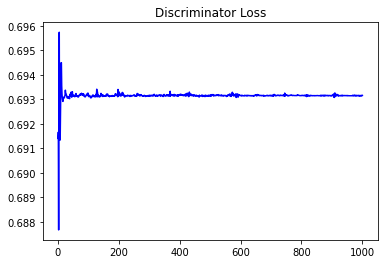

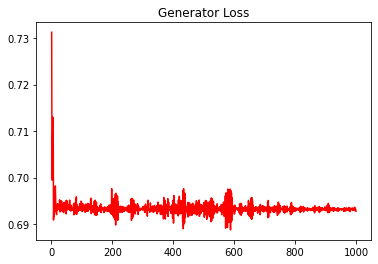

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08662483457844722


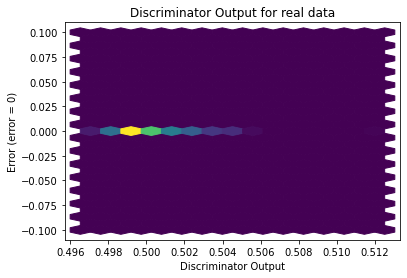

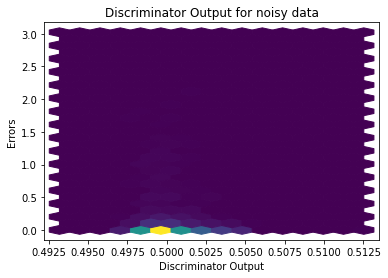

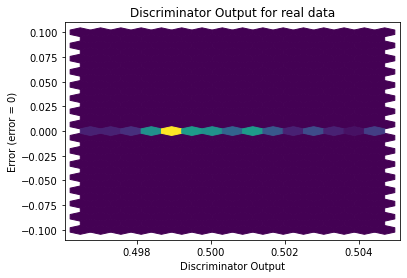

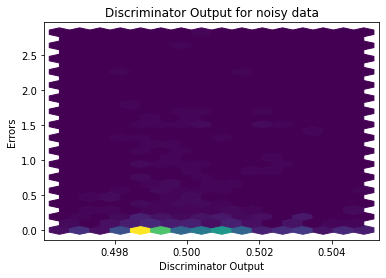

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


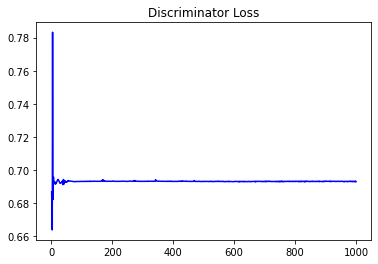

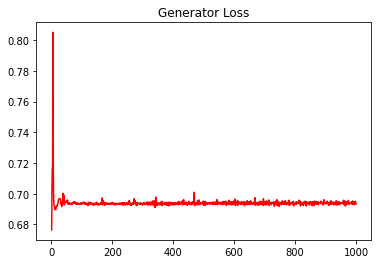

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08241681842331026


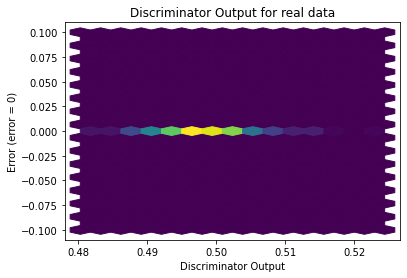

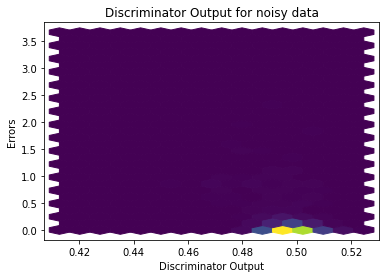

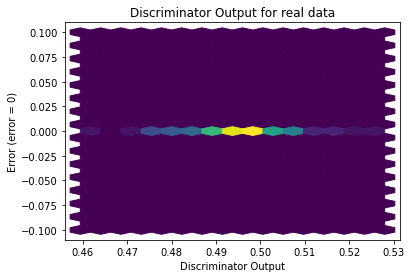

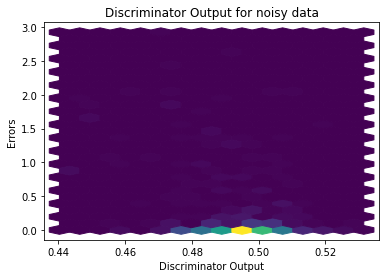

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1148]], requires_grad=True)
